In [1]:
%run ./Package_NN.ipynb
%run ./Package_Uncertainty.ipynb

C:\Users\Prasoon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Prasoon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Prasoon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Prasoon\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarnin

In [2]:
np.random.seed(0)
r = np.random.randint(500)

In [3]:
import statsmodels.api as sm
from sklearn.metrics import precision_recall_fscore_support
sns.set_style('whitegrid')
#from sklearn.metrics import balanced_accuracy_score

In [4]:
df_analysis = pd.read_csv('Desktop/Study_Material/paper_figures/Manuscript/Figures_and_tables/Supplementary/Tables/2.csv')

In [5]:
sample_numbers = list(df_analysis.iloc[1:,1])

In [6]:
analysis_type = 'all_cancer_types'
cancer_types = ['LAML','ACC','BLCA','LGG','BRCA','CESC','CHOL','COAD','UCEC','ESCA','GBM','HNSC','KIRC','KIRP','LIHC','LUAD','LUSC','DLBC','MESO','OV','PAAD','PCPG','PRAD','READ','SKCM','STAD','TGCT','THYM','THCA','UCS','UVM']

In [ ]:
df_pca2 = pd.read_csv('D:/New folder/100_genes_pca2_new.csv')
(X_train, X_test, y_train, y_test) = split_train_test(df_pca2,r)
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T
layers_dims = [X_train.shape[0],250,95,31]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,grad_val] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Cost after epoch 0: 100.214638
Cost after epoch 100: 98.668396
Cost after epoch 200: 97.784966
Cost after epoch 300: 97.394218
Cost after epoch 400: 97.209717
Cost after epoch 500: 97.043793
Cost after epoch 600: 96.973923
Cost after epoch 700: 96.903824
Cost after epoch 800: 96.873451


In [ ]:
dict_mean_ep,dict_mean_test_corr,dict_mean_test_incorr,res,list_final_test,list_final_pred,arr_pred_test_new = uncertainty_analysis(logits_train,y_train,arr_pred_train,logits,y_test,arr_pred_test,1e-9,analysis_type)

diff_list = []
sample_list = []
for i in range(31):
    if (np.isnan(dict_mean_test_corr[i]) == False) and (np.isnan(dict_mean_test_incorr[i]) == False):
        diff_list.append((dict_mean_test_incorr[i]-dict_mean_test_corr[i])/dict_mean_test_corr[i])
        sample_list.append(int(sample_numbers[i]))

In [28]:
len(list_final_pred)/len(y_test)

0.6061946902654868

In [29]:
fscore_filter

NameError: name 'fscore_filter' is not defined

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


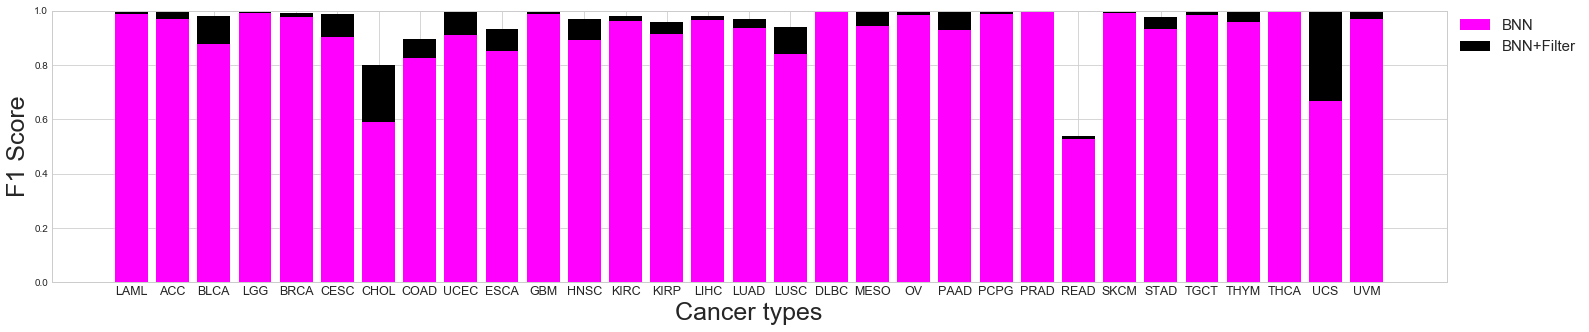

In [9]:
fig = plt.figure(figsize=(25,5))
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='magenta')
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter-fscore,bottom = fscore,label = 'BNN+Filter',color='black')
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('Cancer types',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=12.5)
#plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
#fig.savefig('Desktop/paper_revision/'+str('baseline_filter_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


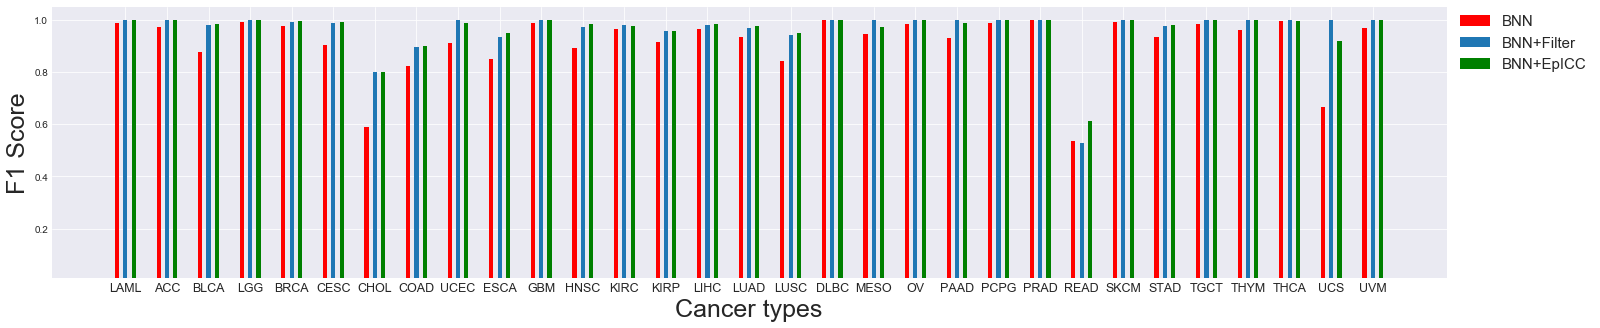

In [10]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(25,5))
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
fscore_corrected = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test_new))[2]
plt.bar(np.arange(0,len(fscore))-0.2,fscore,label = 'BNN',color='r',width=0.1)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,width=0.1,label = 'BNN+Filter')
plt.bar(np.arange(0,len(fscore_corrected))+0.2,np.array(fscore_corrected),label='BNN+EpICC',color='g',width=0.1)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('Cancer types',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=12.5)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
#fig.savefig('Desktop/paper_revision/'+str('method_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

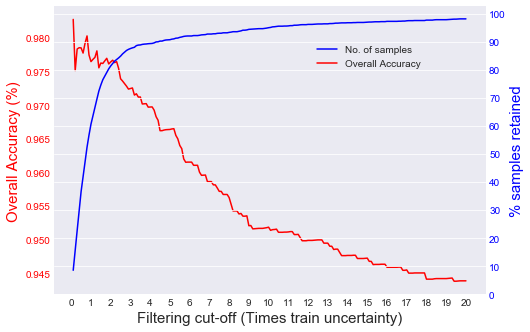

In [11]:
ep_test = com_ep_un(logits)
acc_2 = []
l_temp = np.arange(0.1,20.1,0.1)
sam_2 = []
for j in l_temp:
    list_final_pred = []
    list_final_test = []
    for i in range(len(arr_pred_test)):
        if (ep_test[i]*1e9 <= j* dict_mean_ep[arr_pred_test[i]]):
            list_final_test.append(np.array(y_test)[i])
            list_final_pred.append(arr_pred_test[i])
    acc_2.append(accuracy_score(list_final_test,list_final_pred))
    #acc_2.append(np.mean(precision_recall_fscore_support(list_final_test,list_final_pred)[1]))
    sam_2.append(len(list_final_test)*100/2034)
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()
l1 = ax1.plot(l_temp,np.array(acc_2),c='r',linestyle='-',label='Overall Accuracy')
#l2 = ax1.plot(l_temp,np.array(acc_1)*100,c='r',label='Overall Accuracy method 1')
ax1.tick_params(axis='y', labelcolor='r')
l2 = ax2.plot(l_temp,sam_2,c='b',linestyle = '-',label = 'No. of samples' )
#l4 = ax2.plot(l_temp,sam_1,c='g',label='No. of samples method 1')
ax2.tick_params(axis='y', labelcolor='b')
leg = l2+l1
ax1.set_ylabel('Overall Accuracy (%)', color='r',fontsize=15)
ax2.set_ylabel('% samples retained', color='b',fontsize=15)
ax1.set_xlabel('Filtering cut-off (Times train uncertainty)',fontsize=15)
labs = [l.get_label() for l in leg]
#ax1.legend()
ax1.legend(leg, labs, loc=(0.6,0.77))
ax2.set_yticks(np.arange(0,110,10))
ax1.set_xticks(np.arange(0,21))
#ax1.legend(bbox_to_anchor=(1,0.65))
#ax2.legend(bbox_to_anchor=(0.99,0.80))
#ax2.grid(None)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.grid()
#fig.savefig('Desktop/paper_revision/'+str('filtering_cutoff_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
#fig.savefig('Desktop/paper_figures/'+str('times_train_uncertainty_plot')+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

# Lower Grade Glioma

# Subtypes

In [12]:
analysis_type = 'lgg_subtypes'
cancer_types = ['Oligodendroglioma','Astrocytoma','Oligoastrocytoma']

In [13]:
df_pca2 = pd.read_csv('D:/New folder/brain lower grade glioma',sep='\t')
df_samples = pd.DataFrame(list(df_pca2.columns)[1:])
df_samples.columns = ['sampleID']
df_pca2_new = df_pca2.iloc[:,1:].T.reset_index(drop=True)
genes = list(df_pca2['sample'])
df_pca2_new.columns = genes
df_pca2 = df_pca2_new
filelist = []
for file in glob.glob('D:/New folder/Phenotypic_data1/*'):
    filelist.append(file)
    
for i in range(len(filelist)):
    if filelist[i][31:] =='brain lower grade glioma':
        print(i)
        break
df_temp = pd.read_csv('D:/New folder/Phenotypic_data1/'+str(filelist[3][31:]),sep='\t')
df_temp = df_samples.merge(df_temp,on='sampleID',how='inner')
df_sample_type = df_temp[['sampleID','histological_type']]
df_sample_type_oligodendroglioma = df_sample_type[df_sample_type['histological_type'] == 'Oligodendroglioma']
df_sample_type_astrocytoma = df_sample_type[df_sample_type['histological_type'] == 'Astrocytoma']
df_sample_type_oligoastrocytoma = df_sample_type[df_sample_type['histological_type'] == 'Oligoastrocytoma']
df_sample_type_oligodendroglioma['histological_type'] = 0
df_sample_type_astrocytoma['histological_type'] = 1
df_sample_type_oligoastrocytoma['histological_type'] = 2
#df_phenotype_prediction = pd.concat([df_sample_type_oligodendroglioma,df_sample_type_astrocytoma])
df_phenotype_prediction = pd.concat([df_sample_type_oligodendroglioma,df_sample_type_astrocytoma,df_sample_type_oligoastrocytoma])
df_sample_type_merged = df_samples.merge(df_phenotype_prediction,on='sampleID',how='inner')
df_pca2_with_samples = df_samples.merge(df_pca2,right_index=True,left_index=True)
df_pca2_common = df_sample_type_merged.merge(df_pca2_with_samples,on='sampleID',how='inner')
df_pca2_common.dropna(inplace=True)
df_pca2_common.drop('sampleID',axis=1,inplace=True)
#df_pca2_common.drop('label',axis=1,inplace=True)
df_pca2_common['label'] = list(df_pca2_common['histological_type'])
df_pca2_common.drop('histological_type',axis=1,inplace=True)

3


C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [14]:
l = ['CCNL2',
 'BOK',
 'REST',
 'LOC100272228',
 'C11orf9',
 'OTUD3',
 'C1orf27',
 'NACC1',
 'CCNE2',
 'SLC2A1']   

In [15]:
X_train,X_test,y_train,y_test = split_train_test(df_pca2_common,r)
X_train = X_train.reset_index(drop=True)
X_train=X_train[l]
X_test = X_test[l]
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T
layers_dims = [X_train.shape[0],250,95,Y_train.shape[0]]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,Z] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Cost after epoch 0: 942.024048
Cost after epoch 100: 941.320923
Cost after epoch 200: 941.116028
Cost after epoch 300: 941.462463
Cost after epoch 400: 941.137207
Cost after epoch 500: 941.588745
Cost after epoch 600: 941.193604
Cost after epoch 700: 941.283752
Cost after epoch 800: 940.990906
Cost after epoch 900: 915.794312
Cost after epoch 1000: 915.515076
Cost after epoch 1100: 915.729614
Cost after epoch 1200: 915.681396
Cost after epoch 1300: 915.900879
Cost after epoch 1400: 916.140869
Cost after epoch 1500: 915.295349
Cost after epoch 1600: 896.643616
Cost after epoch 1700: 896.776489
Cost after epoch 1800: 896.302490
Cost after epoch 1900: 896.956360
Cost after epoch 2000: 896.808044
Cost after epoch 2100: 882.855042
Cost after epoch 2200: 882.632751
Cost after epoch 2300: 883.012634
Cost after epoch 2400: 882.746338
Cost after epoch 2500: 871.024536
Cost after epoch 2600: 871.821777
Cost after epoch 2700: 870.111023
Cost after epoch 2800: 861.690002
Cost after epoch 2900: 861

In [92]:
sns.set_style('whitegrid')

C:\Users\Prasoon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


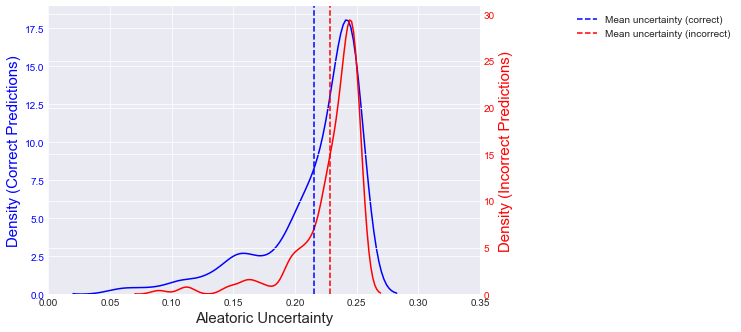

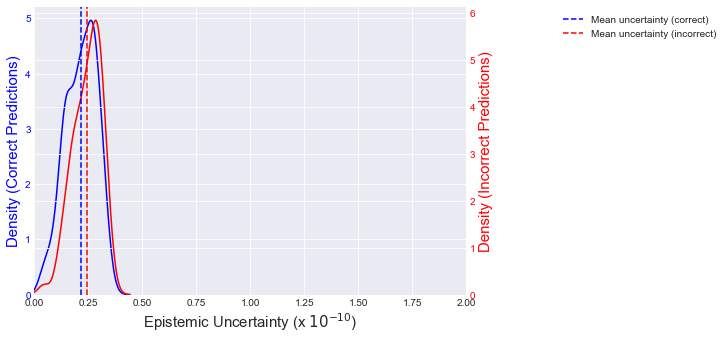

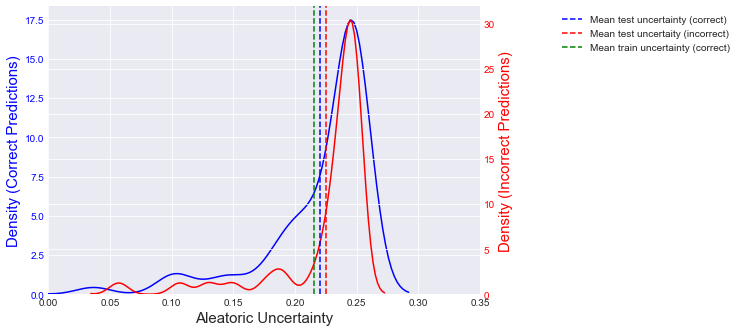

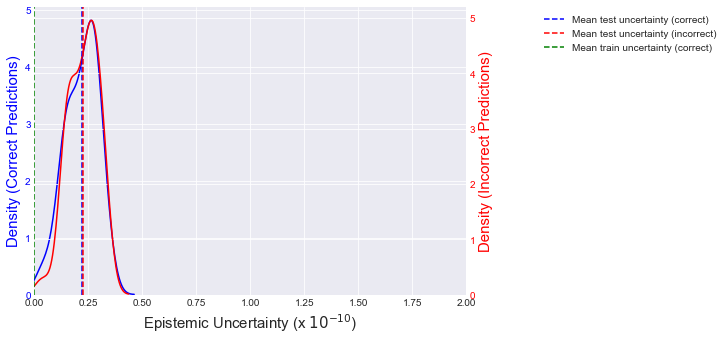

0
(3, 40)
1
(3, 40)
2


No handles with labels found to put in legend.


(3, 27)
EpICC

0.8130841121495327
0.8132716049382717
Filtering

0.6041666666666666
0.5499656002751977


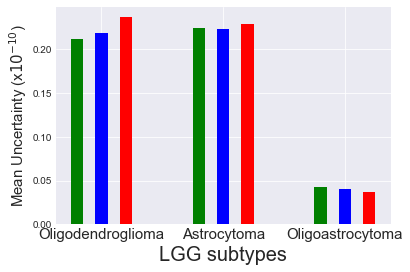

In [16]:
dict_mean_ep,dict_mean_test_corr,dict_mean_test_incorr,res,list_final_test,list_final_pred,arr_pred_test_new = uncertainty_analysis(logits_train,y_train,arr_pred_train,logits,y_test,arr_pred_test,1e-10,'lgg_subtypes')

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


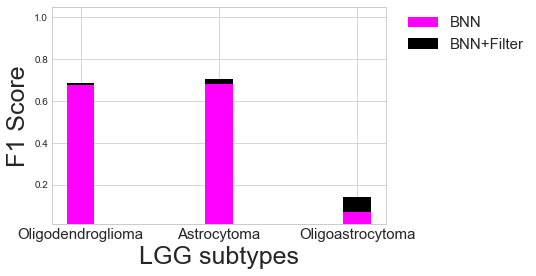

In [17]:
sns.set_style('whitegrid')
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='magenta',width=0.2)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter-fscore,bottom = fscore,label = 'BNN+Filter',color='black',width=0.2)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('LGG subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1.45, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
#fig.savefig('Desktop/paper_revision/'+str('baseline_filter_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [24]:
len(list_final_pred)/len(y_test)

0.4485981308411215

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


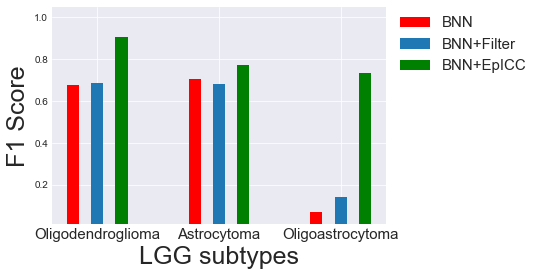

In [18]:
sns.set_style('darkgrid')
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
fscore_corrected = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test_new))[2]
plt.bar(np.arange(0,len(fscore))-0.2,fscore,label = 'BNN',color='r',width=0.1)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,width=0.1,label = 'BNN+Filter')
plt.bar(np.arange(0,len(fscore_corrected))+0.2,np.array(fscore_corrected),label='BNN+EpICC',color='g',width=0.1)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('LGG subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
#fig.savefig('Desktop/paper_revision/'+str('method_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [23]:
len(list_final_test)/len(y_test)

0.4485981308411215

<BarContainer object of 3 artists>

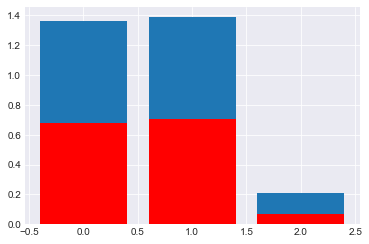

In [20]:
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='r')
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,bottom = fscore,label = 'BNN+Filter') 

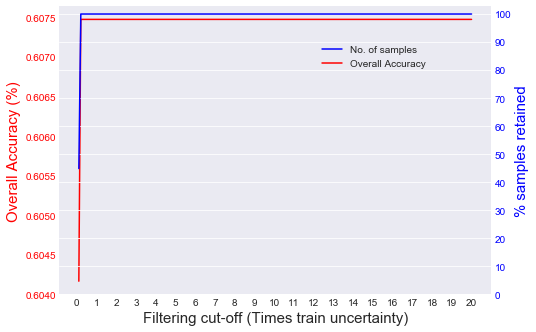

In [26]:
ep_test = com_ep_un(logits)
acc_2 = []
l_temp = np.arange(0.1,20.1,0.1)
sam_2 = []
for j in l_temp:
    list_final_pred = []
    list_final_test = []
    for i in range(len(arr_pred_test)):
        if (ep_test[i]*1e9 <= j* dict_mean_ep[arr_pred_test[i]]):
            list_final_test.append(np.array(y_test)[i])
            list_final_pred.append(arr_pred_test[i])
    acc_2.append(accuracy_score(list_final_test,list_final_pred))
    #acc_2.append(np.mean(precision_recall_fscore_support(list_final_test,list_final_pred)[1]))
    sam_2.append(len(list_final_test)*100/len(y_test))
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()
l1 = ax1.plot(l_temp,np.array(acc_2),c='r',linestyle='-',label='Overall Accuracy')
#l2 = ax1.plot(l_temp,np.array(acc_1)*100,c='r',label='Overall Accuracy method 1')
ax1.tick_params(axis='y', labelcolor='r')
l2 = ax2.plot(l_temp,sam_2,c='b',linestyle = '-',label = 'No. of samples' )
#l4 = ax2.plot(l_temp,sam_1,c='g',label='No. of samples method 1')
ax2.tick_params(axis='y', labelcolor='b')
leg = l2+l1
ax1.set_ylabel('Overall Accuracy (%)', color='r',fontsize=15)
ax2.set_ylabel('% samples retained', color='b',fontsize=15)
ax1.set_xlabel('Filtering cut-off (Times train uncertainty)',fontsize=15)
labs = [l.get_label() for l in leg]
#ax1.legend()
ax1.legend(leg, labs, loc=(0.6,0.77))
ax2.set_yticks(np.arange(0,110,10))
ax1.set_xticks(np.arange(0,21))
#ax1.legend(bbox_to_anchor=(1,0.65))
#ax2.legend(bbox_to_anchor=(0.99,0.80))
#ax2.grid(None)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.grid()
fig.savefig('Desktop/paper_revision/'+str('filtering_cutoff_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
#fig.savefig('Desktop/paper_figures/'+str('times_train_uncertainty_plot')+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

# Breast Invasive Carcinoma

In [46]:
analysis_type = 'brca_subtypes'
cancer_types = ['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma']

In [47]:
df_pca2 = pd.read_csv('D:/New folder/breast invasive carcinoma',sep='\t')
df_samples = pd.DataFrame(list(df_pca2.columns)[1:])
df_samples.columns = ['sampleID']
df_pca2_new = df_pca2.iloc[:,1:].T.reset_index(drop=True)
genes = list(df_pca2['sample'])
df_pca2_new.columns = genes
df_pca2 = df_pca2_new
filelist = []
for file in glob.glob('D:/New folder/Phenotypic_data1/*'):
    filelist.append(file)
c = 0    
for i in range(len(filelist)):
    if filelist[i][31:] =='breast invasive carcinoma':
        print(i)
        c=i
        break
df_temp = pd.read_csv('D:/New folder/Phenotypic_data1/'+str(filelist[c][31:]),sep='\t')
df_temp = df_samples.merge(df_temp,on='sampleID',how='inner')
df_sample_type = df_temp[['sampleID','histological_type']]
df_sample_type_ductal = df_sample_type[df_sample_type['histological_type'] == 'Infiltrating Ductal Carcinoma']
df_sample_type_lobular = df_sample_type[df_sample_type['histological_type'] == 'Infiltrating Lobular Carcinoma']
#df_sample_type_oligoastrocytoma = df_sample_type[df_sample_type['histological_type'] == 'Oligoastrocytoma']
df_sample_type_ductal['histological_type'] = 0
df_sample_type_lobular['histological_type'] = 1
#df_sample_type_oligoastrocytoma['histological_type'] = 2
df_phenotype_prediction = pd.concat([df_sample_type_ductal,df_sample_type_lobular])
df_sample_type_merged = df_samples.merge(df_phenotype_prediction,on='sampleID',how='inner')
df_pca2_with_samples = df_samples.merge(df_pca2,right_index=True,left_index=True)
df_pca2_common = df_sample_type_merged.merge(df_pca2_with_samples,on='sampleID',how='inner')
df_pca2_common.dropna(inplace=True)
df_pca2_common.drop('sampleID',axis=1,inplace=True)
#df_pca2_common.drop('label',axis=1,inplace=True)
df_pca2_common['label'] = list(df_pca2_common['histological_type'])
df_pca2_common.drop('histological_type',axis=1,inplace=True)

4


C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
l = ['CD48',
 'IL2RG',
 'SELPLG',
 'ARHGAP15',
 'NCKAP1L',
 'CD2',
 'PYHIN1',
 'GZMA',
 'SAMD3',
 'PJA2',
 'C5orf41',
 'KIAA1109',
 'LSM4',
 'TTBK2',
 'TCP11L2',
 'FAM63B',
 'BOD1L',
 'PSMG3',
 'CLDN5',
 'KANK3',
 'USHBP1',
 'GRASP',
 'PLAC9',
 'AVPR2',
 'GRRP1',
 'GPIHBP1',
 'IGFBP6',
 'DEGS2',
 'MLPH',
 'PCSK4',
 'PRR15',
 'FBP1',
 'GATA3',
 'CCDC96',
 'P4HTM',
 'B3GNT5',
 'STAG3L3',
 'LENG8',
 'PVRIG',
 'RPL32P3',
 'AGAP6',
 'DMTF1',
 'KIAA0907',
 'COL1A2',
 'LOC100128842',
 'CDC42BPG',
 'PTK7',
 'PVRL4',
 'GRAMD2',
 'FBLIM1',
 'KRT7',
 'ZNF710',
 'SDC1',
 'CCNJL',
 'MUCL1',
 'SPINK8',
 'CEACAM7',
 'POF1B',
 'ALDH3B2',
 'ATP13A5',
 'ACPP',
 'ATP13A4',
 'CLCA2',
 'HCFC1',
 'FAM129B',
 'NACC2',
 'MITD1',
 'NCRNA00201',
 'PHF11',
 'TMEM184B',
 'MDM4',
 'WNT9A',
 'TTC22',
 'PDZK1IP1',
 'SS18L1',
 'GPR137C',
 'DNASE1',
 'NFIX',
 'C16orf87',
 'MSI1',
 'NKIRAS2',
 'CHMP4C',
 'COL2A1',
 'NAGS',
 'HAP1',
 'GABPB2',
 'ZBTB7B',
 'CDH1',
 'IDH1']

In [49]:
X_train,X_test,y_train,y_test = split_train_test(df_pca2_common,r)
X_train = X_train.reset_index(drop=True)
X_train=X_train[l]
X_test = X_test[l]
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T
layers_dims = [X_train.shape[0],250,95,Y_train.shape[0]]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,Z] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Cost after epoch 0: 787.892883
Cost after epoch 100: 787.066895
Cost after epoch 200: 787.109985
Cost after epoch 300: 786.814331
Cost after epoch 400: 786.853821
Cost after epoch 500: 787.075684
Cost after epoch 600: 786.743408
Cost after epoch 700: 786.913635
Cost after epoch 800: 786.618958
Cost after epoch 900: 765.443176
Cost after epoch 1000: 764.964722
Cost after epoch 1100: 765.172363
Cost after epoch 1200: 765.209778
Cost after epoch 1300: 765.458313
Cost after epoch 1400: 765.452698
Cost after epoch 1500: 765.037781
Cost after epoch 1600: 749.770020
Cost after epoch 1700: 749.652649
Cost after epoch 1800: 749.375061
Cost after epoch 1900: 749.701721
Cost after epoch 2000: 749.990540
Cost after epoch 2100: 737.760803
Cost after epoch 2200: 737.948059
Cost after epoch 2300: 738.095703
Cost after epoch 2400: 738.009216
Cost after epoch 2500: 727.999695
Cost after epoch 2600: 728.601990
Cost after epoch 2700: 727.636658
Cost after epoch 2800: 719.992188
Cost after epoch 2900: 719

In [50]:
sns.set_style('whitegrid')

C:\Users\Prasoon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Prasoon\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Prasoon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


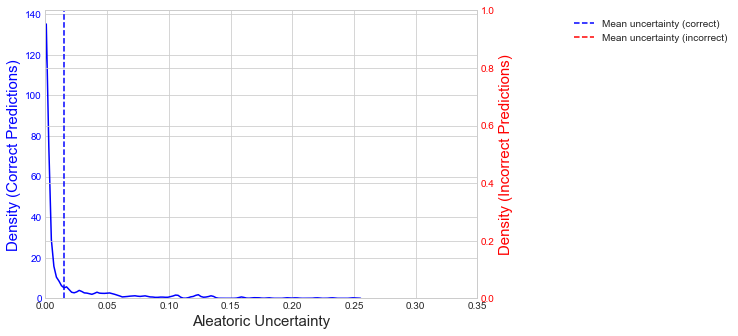

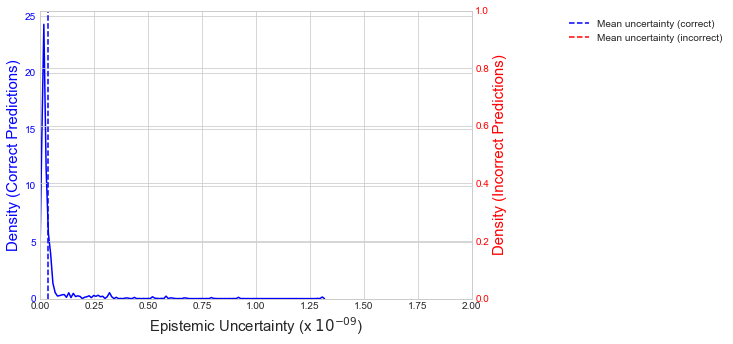

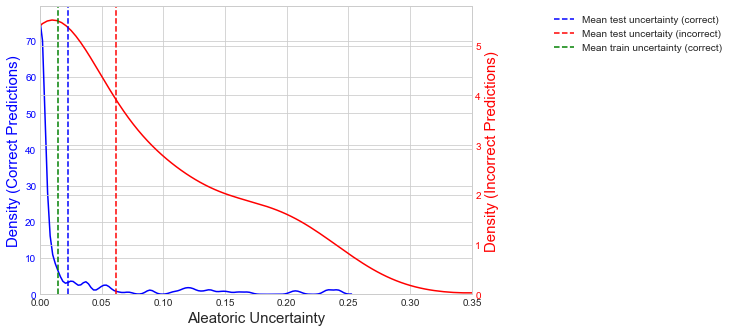

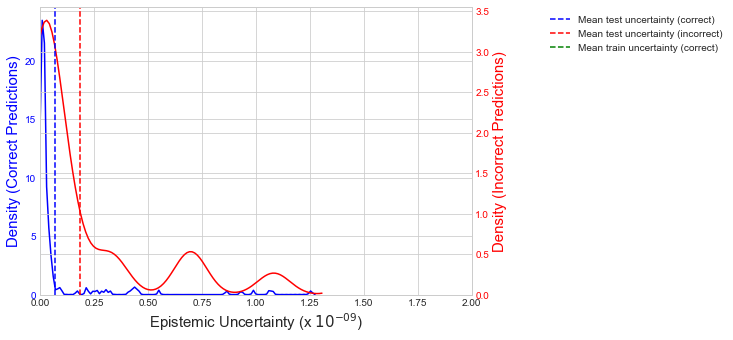

No handles with labels found to put in legend.


0
(2, 177)
1
(2, 42)
EpICC

0.9497716894977168
0.8962873284907183
Filtering

0.9290322580645162
0.8775459513164431


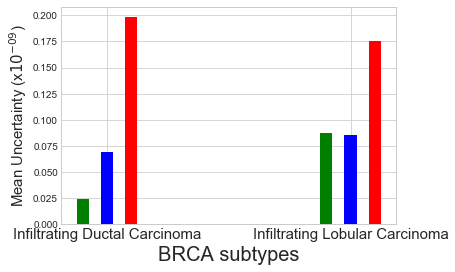

In [51]:
dict_mean_ep,dict_mean_test_corr,dict_mean_test_incorr,res,list_final_test,list_final_pred,arr_pred_test_new = uncertainty_analysis(logits_train,y_train,arr_pred_train,logits,y_test,arr_pred_test,1e-9,analysis_type)

In [52]:
len(list_final_pred)/len(y_test)

0.7077625570776256

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


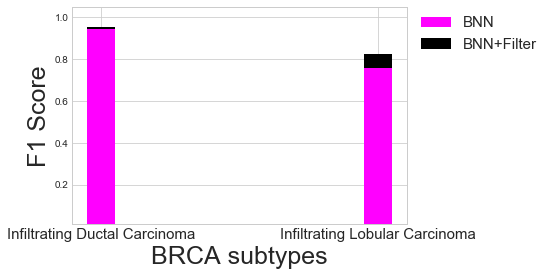

In [53]:
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='magenta',width=0.1)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter-fscore,bottom = fscore,label = 'BNN+Filter',color='black',width=0.1)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('BRCA subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('baseline_filter_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


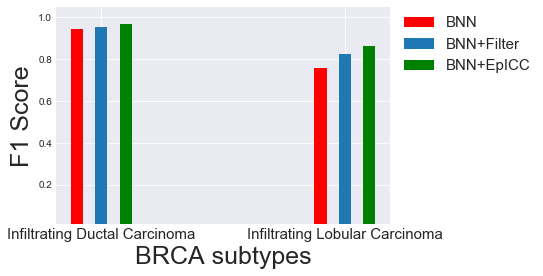

In [34]:
sns.set_style('darkgrid')
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
fscore_corrected = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test_new))[2]
#fig = plt.figure(figsize=(20,5))
plt.bar(np.arange(0,len(fscore))-0.1,fscore,label = 'BNN',color='r',width=0.05)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,width=0.05,label = 'BNN+Filter')
plt.bar(np.arange(0,len(fscore_corrected))+0.1,np.array(fscore_corrected),label='BNN+EpICC',color='g',width=0.05)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('BRCA subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('method_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

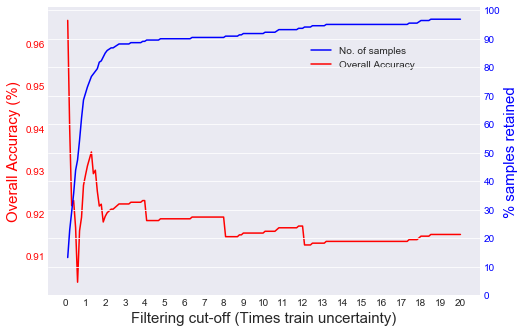

In [35]:
ep_test = com_ep_un(logits)
acc_2 = []
l_temp = np.arange(0.1,20.1,0.1)
sam_2 = []
for j in l_temp:
    list_final_pred = []
    list_final_test = []
    for i in range(len(arr_pred_test)):
        if (ep_test[i]*1e9 <= j* dict_mean_ep[arr_pred_test[i]]):
            list_final_test.append(np.array(y_test)[i])
            list_final_pred.append(arr_pred_test[i])
    acc_2.append(accuracy_score(list_final_test,list_final_pred))
    #acc_2.append(np.mean(precision_recall_fscore_support(list_final_test,list_final_pred)[1]))
    sam_2.append(len(list_final_test)*100/len(y_test))
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()
l1 = ax1.plot(l_temp,np.array(acc_2),c='r',linestyle='-',label='Overall Accuracy')
#l2 = ax1.plot(l_temp,np.array(acc_1)*100,c='r',label='Overall Accuracy method 1')
ax1.tick_params(axis='y', labelcolor='r')
l2 = ax2.plot(l_temp,sam_2,c='b',linestyle = '-',label = 'No. of samples' )
#l4 = ax2.plot(l_temp,sam_1,c='g',label='No. of samples method 1')
ax2.tick_params(axis='y', labelcolor='b')
leg = l2+l1
ax1.set_ylabel('Overall Accuracy (%)', color='r',fontsize=15)
ax2.set_ylabel('% samples retained', color='b',fontsize=15)
ax1.set_xlabel('Filtering cut-off (Times train uncertainty)',fontsize=15)
labs = [l.get_label() for l in leg]
#ax1.legend()
ax1.legend(leg, labs, loc=(0.6,0.77))
ax2.set_yticks(np.arange(0,110,10))
ax1.set_xticks(np.arange(0,21))
#ax1.legend(bbox_to_anchor=(1,0.65))
#ax2.legend(bbox_to_anchor=(0.99,0.80))
#ax2.grid(None)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.grid()
fig.savefig('Desktop/paper_revision/'+str('filtering_cutoff_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
#fig.savefig('Desktop/paper_figures/'+str('times_train_uncertainty_plot')+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

# Corpus Endometroid Carcinoma

In [54]:
analysis_type = 'coen_subtypes'
cancer_types =['Endometroid endometrial carcinoma','Serous endometrial carcinoma']

In [55]:
df_pca2 = pd.read_csv('D:/New folder/corpus endometrioid carcinoma',sep='\t')
df_samples = pd.DataFrame(list(df_pca2.columns)[1:])
df_samples.columns = ['sampleID']
df_pca2_new = df_pca2.iloc[:,1:].T.reset_index(drop=True)
genes = list(df_pca2['sample'])
df_pca2_new.columns = genes
df_pca2 = df_pca2_new
filelist = []
for file in glob.glob('D:/New folder/Phenotypic_data1/*'):
    filelist.append(file)
c = 0    
for i in range(len(filelist)):
    if filelist[i][31:] =='corpus endometrioid carcinoma':
        print(i)
        c=i
        break
df_temp = pd.read_csv('D:/New folder/Phenotypic_data1/'+str(filelist[c][31:]),sep='\t')
df_temp = df_samples.merge(df_temp,on='sampleID',how='inner')
df_sample_type = df_temp[['sampleID','histological_type']]
df_sample_type_endometroid = df_sample_type[df_sample_type['histological_type'] == 'Endometrioid endometrial adenocarcinoma']
df_sample_type_serous = df_sample_type[df_sample_type['histological_type'] == 'Serous endometrial adenocarcinoma']
#df_sample_type_oligoastrocytoma = df_sample_type[df_sample_type['histological_type'] == 'Oligoastrocytoma']
df_sample_type_endometroid['histological_type'] = 0
df_sample_type_serous['histological_type'] = 1
#df_sample_type_oligoastrocytoma['histological_type'] = 2
df_phenotype_prediction = pd.concat([df_sample_type_endometroid,df_sample_type_serous])
df_sample_type_merged = df_samples.merge(df_phenotype_prediction,on='sampleID',how='inner')
df_pca2_with_samples = df_samples.merge(df_pca2,right_index=True,left_index=True)
df_pca2_common = df_sample_type_merged.merge(df_pca2_with_samples,on='sampleID',how='inner')
df_pca2_common.dropna(inplace=True)
df_pca2_common.drop('sampleID',axis=1,inplace=True)
#df_pca2_common.drop('label',axis=1,inplace=True)
df_pca2_common['label'] = list(df_pca2_common['histological_type'])
df_pca2_common.drop('histological_type',axis=1,inplace=True)

8


C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
l = ['BUB1',
 'MELK',
 'MRPL52',
 'ZNF593',
 'FRMPD2',
 'DLEC1',
 'CARD11',
 'RNF213',
 'BIRC3',
 'APOL1',
 'MAST2',
 'HPCA',
 'FZD2',
 'AFG3L1',
 'MFI2',
 'RET',
 'ZCCHC18',
 'C4orf27',
 'SRCIN1',
 'FGF19']

In [57]:
X_train,X_test,y_train,y_test = split_train_test(df_pca2_common,r)
X_train = X_train.reset_index(drop=True)
X_train=X_train[l]
X_test = X_test[l]
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T
layers_dims = [X_train.shape[0],250,95,Y_train.shape[0]]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,Z] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Cost after epoch 0: 3068.283936
Cost after epoch 100: 3066.326416
Cost after epoch 200: 3065.283447
Cost after epoch 300: 3066.927002
Cost after epoch 400: 3066.831787
Cost after epoch 500: 3068.006836
Cost after epoch 600: 3066.492920
Cost after epoch 700: 3066.506836
Cost after epoch 800: 3064.816162
Cost after epoch 900: 2983.560791
Cost after epoch 1000: 2981.901123
Cost after epoch 1100: 2982.191406
Cost after epoch 1200: 2982.049316
Cost after epoch 1300: 2983.401611
Cost after epoch 1400: 2983.574951
Cost after epoch 1500: 2981.399658
Cost after epoch 1600: 2921.291504
Cost after epoch 1700: 2921.573975
Cost after epoch 1800: 2920.157471
Cost after epoch 1900: 2921.673340
Cost after epoch 2000: 2921.622803
Cost after epoch 2100: 2876.447510
Cost after epoch 2200: 2875.305176
Cost after epoch 2300: 2876.459229
Cost after epoch 2400: 2875.526367
Cost after epoch 2500: 2837.585205
Cost after epoch 2600: 2839.095703
Cost after epoch 2700: 2835.294434
Cost after epoch 2800: 2806.5788

C:\Users\Prasoon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


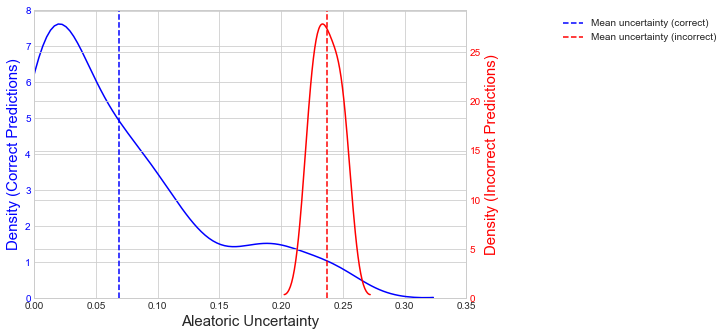

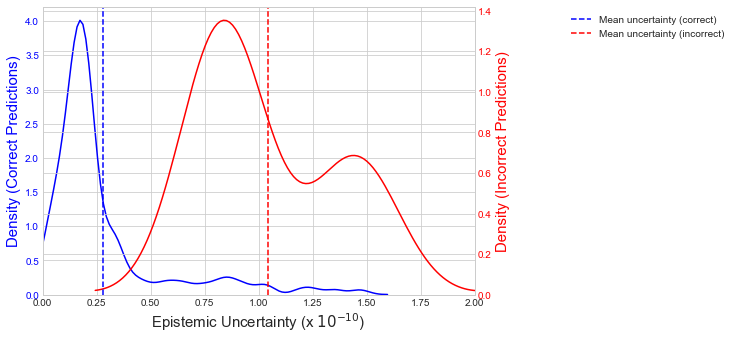

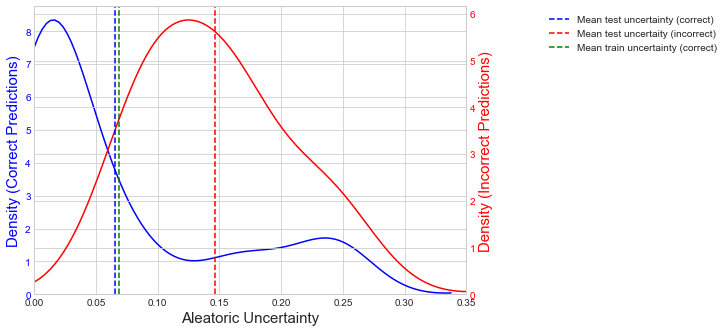

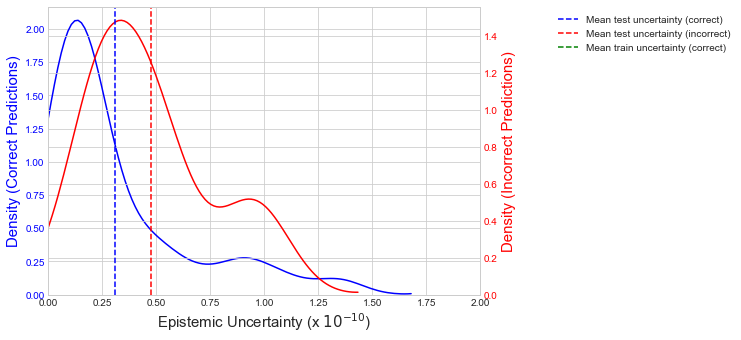

No handles with labels found to put in legend.


0
(2, 24)
1
(2, 13)
EpICC

1.0
1.0
Filtering

0.9130434782608695
0.9333333333333333


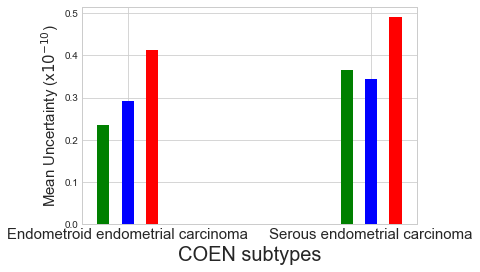

In [58]:
sns.set_style('whitegrid')
dict_mean_ep,dict_mean_test_corr,dict_mean_test_incorr,res,list_final_test,list_final_pred,arr_pred_test_new = uncertainty_analysis(logits_train,y_train,arr_pred_train,logits,y_test,arr_pred_test,1e-10,analysis_type)

In [59]:
len(list_final_pred)/len(y_test)

0.6216216216216216

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


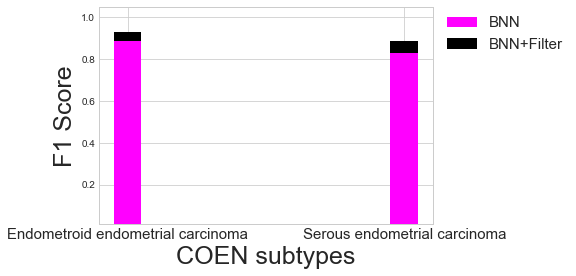

In [60]:
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='magenta',width=0.1)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter-fscore,bottom = fscore,label = 'BNN+Filter',color='black',width=0.1)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('COEN subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('baseline_filter_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


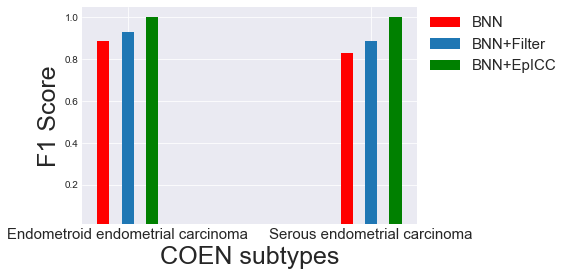

In [42]:
sns.set_style('darkgrid')
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
fscore_corrected = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test_new))[2]
plt.bar(np.arange(0,len(fscore))-0.1,fscore,label = 'BNN',color='r',width=0.05)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,width=0.05,label = 'BNN+Filter')
plt.bar(np.arange(0,len(fscore_corrected))+0.1,np.array(fscore_corrected),label='BNN+EpICC',color='g',width=0.05)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('COEN subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('method_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

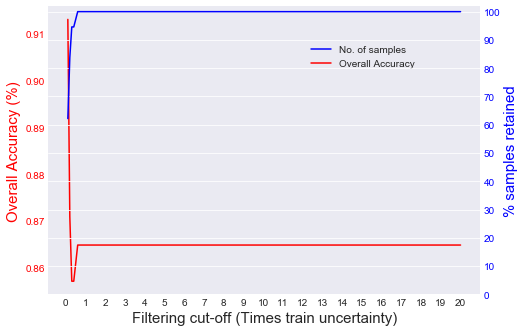

In [43]:
ep_test = com_ep_un(logits)
acc_2 = []
l_temp = np.arange(0.1,20.1,0.1)
sam_2 = []
for j in l_temp:
    list_final_pred = []
    list_final_test = []
    for i in range(len(arr_pred_test)):
        if (ep_test[i]*1e9 <= j* dict_mean_ep[arr_pred_test[i]]):
            list_final_test.append(np.array(y_test)[i])
            list_final_pred.append(arr_pred_test[i])
    acc_2.append(accuracy_score(list_final_test,list_final_pred))
    #acc_2.append(np.mean(precision_recall_fscore_support(list_final_test,list_final_pred)[1]))
    sam_2.append(len(list_final_test)*100/len(y_test))
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()
l1 = ax1.plot(l_temp,np.array(acc_2),c='r',linestyle='-',label='Overall Accuracy')
#l2 = ax1.plot(l_temp,np.array(acc_1)*100,c='r',label='Overall Accuracy method 1')
ax1.tick_params(axis='y', labelcolor='r')
l2 = ax2.plot(l_temp,sam_2,c='b',linestyle = '-',label = 'No. of samples' )
#l4 = ax2.plot(l_temp,sam_1,c='g',label='No. of samples method 1')
ax2.tick_params(axis='y', labelcolor='b')
leg = l2+l1
ax1.set_ylabel('Overall Accuracy (%)', color='r',fontsize=15)
ax2.set_ylabel('% samples retained', color='b',fontsize=15)
ax1.set_xlabel('Filtering cut-off (Times train uncertainty)',fontsize=15)
labs = [l.get_label() for l in leg]
#ax1.legend()
ax1.legend(leg, labs, loc=(0.6,0.77))
ax2.set_yticks(np.arange(0,110,10))
ax1.set_xticks(np.arange(0,21))
#ax1.legend(bbox_to_anchor=(1,0.65))
#ax2.legend(bbox_to_anchor=(0.99,0.80))
#ax2.grid(None)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.grid()
fig.savefig('Desktop/paper_revision/'+str('filtering_cutoff_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
#fig.savefig('Desktop/paper_figures/'+str('times_train_uncertainty_plot')+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

# Esophageal Carcinoma

In [61]:
analysis_type = 'esca_subtypes'
cancer_types =['Squamous Cell Carcinoma','Adenocarcinoma']

In [62]:
df_pca2 = pd.read_csv('D:/New folder/esophageal carcinoma',sep='\t')
df_samples = pd.DataFrame(list(df_pca2.columns)[1:])
df_samples.columns = ['sampleID']
df_pca2_new = df_pca2.iloc[:,1:].T.reset_index(drop=True)
genes = list(df_pca2['sample'])
df_pca2_new.columns = genes
df_pca2 = df_pca2_new
filelist = []
for file in glob.glob('D:/New folder/Phenotypic_data1/*'):
    filelist.append(file)
c = 0    
for i in range(len(filelist)):
    if filelist[i][31:] =='esophageal carcinoma':
        print(i)
        c=i
        break
df_temp = pd.read_csv('D:/New folder/Phenotypic_data1/'+str(filelist[c][31:]),sep='\t')
df_temp = df_samples.merge(df_temp,on='sampleID',how='inner')
df_sample_type = df_temp[['sampleID','histological_type']]
df_sample_type_squamous = df_sample_type[df_sample_type['histological_type'] == 'Esophagus Squamous Cell Carcinoma']
df_sample_type_adeno = df_sample_type[df_sample_type['histological_type'] == 'Esophagus Adenocarcinoma, NOS']
#df_sample_type_oligoastrocytoma = df_sample_type[df_sample_type['histological_type'] == 'Oligoastrocytoma']
df_sample_type_squamous['histological_type'] = 0
df_sample_type_adeno['histological_type'] = 1
#df_sample_type_oligoastrocytoma['histological_type'] = 2
df_phenotype_prediction = pd.concat([df_sample_type_squamous,df_sample_type_adeno])
df_sample_type_merged = df_samples.merge(df_phenotype_prediction,on='sampleID',how='inner')
df_pca2_with_samples = df_samples.merge(df_pca2,right_index=True,left_index=True)
df_pca2_common = df_sample_type_merged.merge(df_pca2_with_samples,on='sampleID',how='inner')
df_pca2_common.dropna(inplace=True)
df_pca2_common.drop('sampleID',axis=1,inplace=True)
#df_pca2_common.drop('label',axis=1,inplace=True)
df_pca2_common['label'] = list(df_pca2_common['histological_type'])
df_pca2_common.drop('histological_type',axis=1,inplace=True)

9


C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
l = ['EVC',
 'GCC2',
 'OR5T1',
 'AHNAK',
 'PFDN5',
 'C17orf69',
 'DHX30',
 'FASLG',
 'MAGEA2',
 'LOC146880']

In [64]:
X_train,X_test,y_train,y_test = split_train_test(df_pca2_common,r)
X_train = X_train.reset_index(drop=True)
X_train=X_train[l]
X_test = X_test[l]
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T
layers_dims = [X_train.shape[0],250,95,Y_train.shape[0]]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,Z] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Cost after epoch 0: 2536.641357
Cost after epoch 100: 2534.974121
Cost after epoch 200: 2534.261230
Cost after epoch 300: 2535.440674
Cost after epoch 400: 2534.732910
Cost after epoch 500: 2535.764893
Cost after epoch 600: 2534.859131
Cost after epoch 700: 2535.071289
Cost after epoch 800: 2534.242432
Cost after epoch 900: 2466.270020
Cost after epoch 1000: 2465.679199
Cost after epoch 1100: 2466.126953
Cost after epoch 1200: 2465.807617
Cost after epoch 1300: 2466.730713
Cost after epoch 1400: 2467.254639
Cost after epoch 1500: 2465.025391
Cost after epoch 1600: 2414.728516
Cost after epoch 1700: 2415.256348
Cost after epoch 1800: 2414.182861
Cost after epoch 1900: 2415.648193
Cost after epoch 2000: 2415.224854
Cost after epoch 2100: 2377.676514
Cost after epoch 2200: 2377.078369
Cost after epoch 2300: 2377.807373
Cost after epoch 2400: 2377.260742
Cost after epoch 2500: 2345.732178
Cost after epoch 2600: 2347.964111
Cost after epoch 2700: 2343.190674
Cost after epoch 2800: 2320.6181

C:\Users\Prasoon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


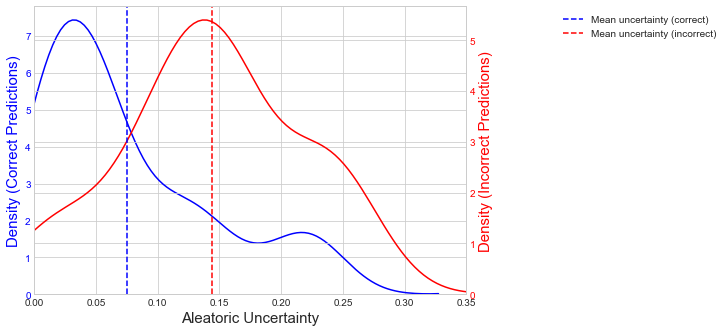

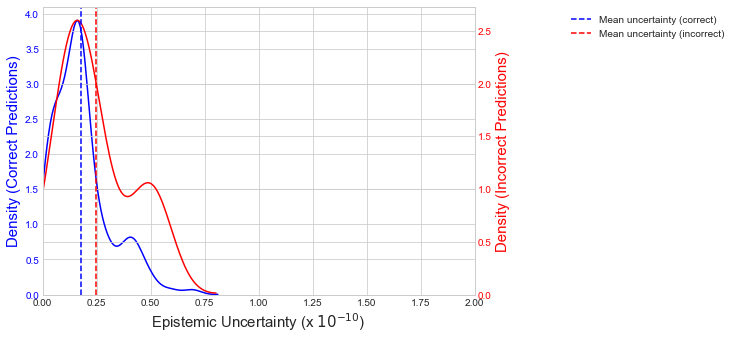

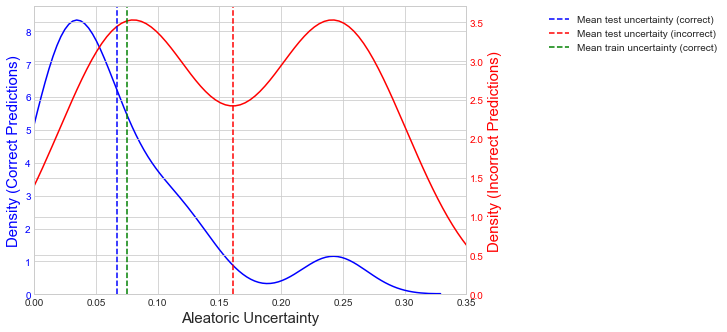

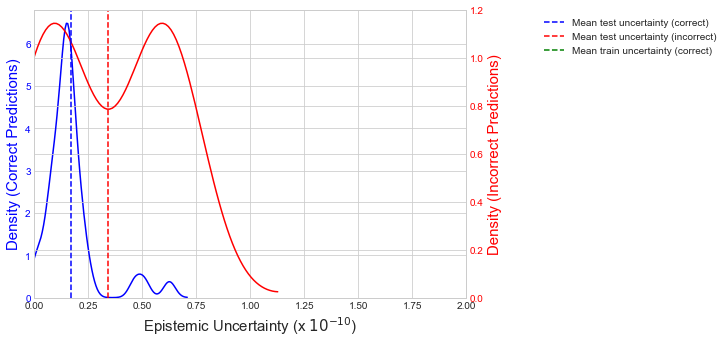

No handles with labels found to put in legend.


0
(2, 20)
1
(2, 20)
EpICC

0.975
0.975
Filtering

0.9642857142857143
0.9722222222222222


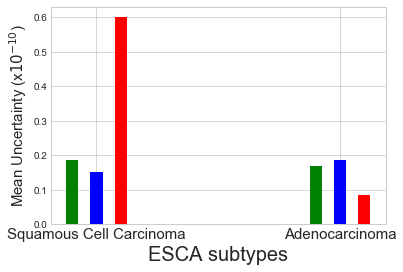

In [65]:
sns.set_style('whitegrid')
dict_mean_ep,dict_mean_test_corr,dict_mean_test_incorr,res,list_final_test,list_final_pred,arr_pred_test_new = uncertainty_analysis(logits_train,y_train,arr_pred_train,logits,y_test,arr_pred_test,1e-10,analysis_type)

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


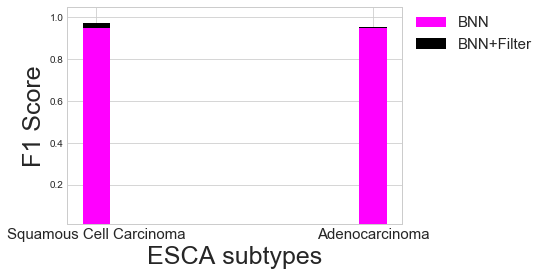

In [66]:
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='magenta',width=0.1)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter-fscore,bottom = fscore,label = 'BNN+Filter',color='black',width=0.1)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('ESCA subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('baseline_filter_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [49]:
len(list_final_pred)/len(y_test)

0.7

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


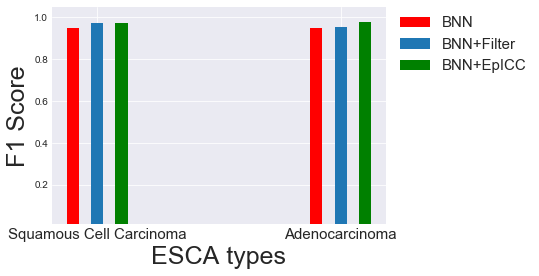

In [50]:
sns.set_style('darkgrid')
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
fscore_corrected = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test_new))[2]
plt.bar(np.arange(0,len(fscore))-0.1,fscore,label = 'BNN',color='r',width=0.05)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,width=0.05,label = 'BNN+Filter')
plt.bar(np.arange(0,len(fscore_corrected))+0.1,np.array(fscore_corrected),label='BNN+EpICC',color='g',width=0.05)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('ESCA types',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('method_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

ep_test = com_ep_un(logits)
acc_2 = []
l_temp = np.arange(0.1,20.1,0.1)
sam_2 = []
for j in l_temp:
    list_final_pred = []
    list_final_test = []
    for i in range(len(arr_pred_test)):
        if (ep_test[i]*1e9 <= j* dict_mean_ep[arr_pred_test[i]]):
            list_final_test.append(np.array(y_test)[i])
            list_final_pred.append(arr_pred_test[i])
    acc_2.append(accuracy_score(list_final_test,list_final_pred))
    #acc_2.append(np.mean(precision_recall_fscore_support(list_final_test,list_final_pred)[1]))
    sam_2.append(len(list_final_test)*100/len(y_test))
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()
l1 = ax1.plot(l_temp,np.array(acc_2),c='r',linestyle='-',label='Overall Accuracy')
#l2 = ax1.plot(l_temp,np.array(acc_1)*100,c='r',label='Overall Accuracy method 1')
ax1.tick_params(axis='y', labelcolor='r')
l2 = ax2.plot(l_temp,sam_2,c='b',linestyle = '-',label = 'No. of samples' )
#l4 = ax2.plot(l_temp,sam_1,c='g',label='No. of samples method 1')
ax2.tick_params(axis='y', labelcolor='b')
leg = l2+l1
ax1.set_ylabel('Overall Accuracy (%)', color='r',fontsize=15)
ax2.set_ylabel('% samples retained', color='b',fontsize=15)
ax1.set_xlabel('Filtering cut-off (Times train uncertainty)',fontsize=15)
labs = [l.get_label() for l in leg]
#ax1.legend()
ax1.legend(leg, labs, loc=(0.6,0.77))
ax2.set_yticks(np.arange(0,110,10))
ax1.set_xticks(np.arange(0,21))
#ax1.legend(bbox_to_anchor=(1,0.65))
#ax2.legend(bbox_to_anchor=(0.99,0.80))
#ax2.grid(None)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.grid()
fig.savefig('Desktop/paper_revision/'+str('filtering_cutoff_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
#fig.savefig('Desktop/paper_figures/'+str('times_train_uncertainty_plot')+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

# Thyroid Carcinoma

In [95]:
analysis_type = 'thca_subtypes'
cancer_types =['Papillary Carcinoma-Classical','Papillary Carcinoma-Follicular']

In [96]:
df_pca2 = pd.read_csv('D:/New folder/thyroid carcinoma',sep='\t')
df_samples = pd.DataFrame(list(df_pca2.columns)[1:])
df_samples.columns = ['sampleID']
df_pca2_new = df_pca2.iloc[:,1:].T.reset_index(drop=True)
genes = list(df_pca2['sample'])
df_pca2_new.columns = genes
df_pca2 = df_pca2_new
filelist = []
for file in glob.glob('D:/New folder/Phenotypic_data1/*'):
    filelist.append(file)
c = 0    
for i in range(len(filelist)):
    if filelist[i][31:] =='thyroid carcinoma':
        print(i)
        c=i
        break
df_temp = pd.read_csv('D:/New folder/Phenotypic_data1/'+str(filelist[c][31:]),sep='\t')
df_temp = df_samples.merge(df_temp,on='sampleID',how='inner')
df_sample_type = df_temp[['sampleID','histological_type']]
df_sample_type_papillary = df_sample_type[df_sample_type['histological_type'] == 'Thyroid Papillary Carcinoma - Classical/usual']
df_sample_type_follicular = df_sample_type[df_sample_type['histological_type'] == 'Thyroid Papillary Carcinoma - Follicular (>= 99% follicular patterned)']
#df_sample_type_oligoastrocytoma = df_sample_type[df_sample_type['histological_type'] == 'Oligoastrocytoma']
df_sample_type_papillary['histological_type'] = 0
df_sample_type_follicular['histological_type'] = 1
#df_sample_type_oligoastrocytoma['histological_type'] = 2
df_phenotype_prediction = pd.concat([df_sample_type_papillary,df_sample_type_follicular])
df_sample_type_merged = df_samples.merge(df_phenotype_prediction,on='sampleID',how='inner')
df_pca2_with_samples = df_samples.merge(df_pca2,right_index=True,left_index=True)
df_pca2_common = df_sample_type_merged.merge(df_pca2_with_samples,on='sampleID',how='inner')
df_pca2_common.dropna(inplace=True)
df_pca2_common.drop('sampleID',axis=1,inplace=True)
#df_pca2_common.drop('label',axis=1,inplace=True)
df_pca2_common['label'] = list(df_pca2_common['histological_type'])
df_pca2_common.drop('histological_type',axis=1,inplace=True)

28


C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Prasoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
l =['KLHDC10',
 'SBNO1',
 'ATE1',
 'ATF2',
 'CLCN3',
 'PTPRE',
 'FN1',
 'KCNQ3',
 'PROS1',
 'SLC34A2',
 'ARAP3',
 'GJC1',
 'GIPC3',
 'SPRY4',
 'MCAM',
 'RBM6',
 'KCNAB3',
 'ZNF700',
 'ANKLE1',
 'PVRIG',
 'EFHC1',
 'RMST',
 'CBX7',
 'CRTC1',
 'COTL1',
 'DHX38',
 'KIAA1967',
 'DDX23',
 'DHX37',
 'WDR81',
 'IFT57',
 'MRPL50',
 'INTS1',
 'GTF2B',
 'SSB',
 'NUPL2',
 'DDX55',
 'MYO19',
 'PIGL',
 'AGK',
 'TSPAN6',
 'FNTB',
 'APEX1',
 'ZBTB12',
 'RIC8A',
 'TINAGL1',
 'CD27',
 'HSPA12A',
 'FAM110B',
 'FBXW7']

In [98]:
X_train,X_test,y_train,y_test = split_train_test(df_pca2_common,r)
X_train = X_train.reset_index(drop=True)
X_train=X_train[l]
X_test = X_test[l]
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T
layers_dims = [X_train.shape[0],250,95,Y_train.shape[0]]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,Z] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Cost after epoch 0: 1297.265259
Cost after epoch 100: 1295.795044
Cost after epoch 200: 1296.238892
Cost after epoch 300: 1296.489014
Cost after epoch 400: 1296.103516
Cost after epoch 500: 1296.486816
Cost after epoch 600: 1295.860229
Cost after epoch 700: 1296.495850
Cost after epoch 800: 1295.695435
Cost after epoch 900: 1261.155884
Cost after epoch 1000: 1260.339722
Cost after epoch 1100: 1261.160889
Cost after epoch 1200: 1260.738281
Cost after epoch 1300: 1260.809448
Cost after epoch 1400: 1261.175293
Cost after epoch 1500: 1260.312134
Cost after epoch 1600: 1234.932495
Cost after epoch 1700: 1235.103882
Cost after epoch 1800: 1234.342163
Cost after epoch 1900: 1235.092163
Cost after epoch 2000: 1234.702026
Cost after epoch 2100: 1215.894775
Cost after epoch 2200: 1215.454468
Cost after epoch 2300: 1215.454224
Cost after epoch 2400: 1215.828247
Cost after epoch 2500: 1199.227417
Cost after epoch 2600: 1199.866455
Cost after epoch 2700: 1198.429199
Cost after epoch 2800: 1186.4626

C:\Users\Prasoon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


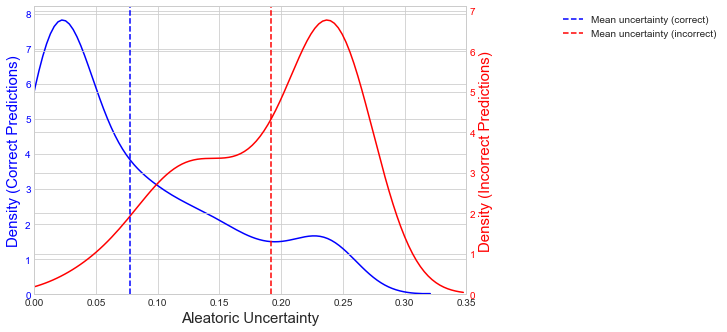

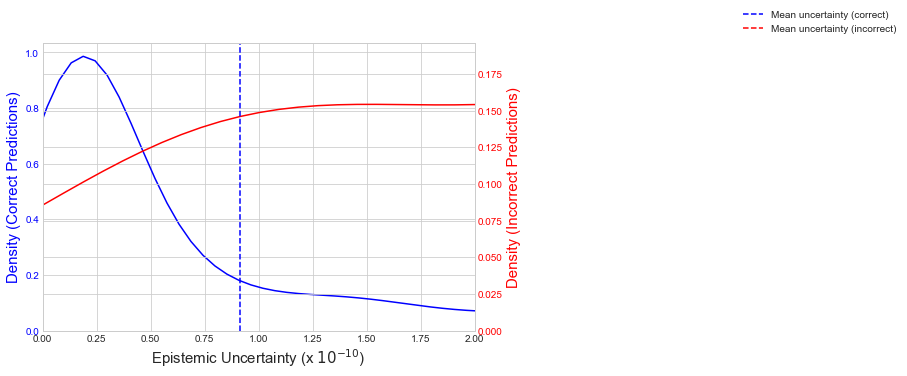

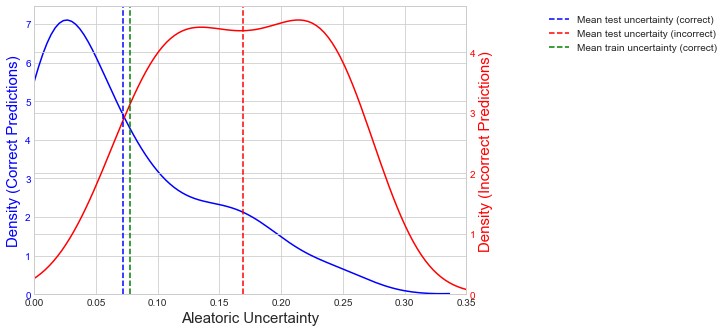

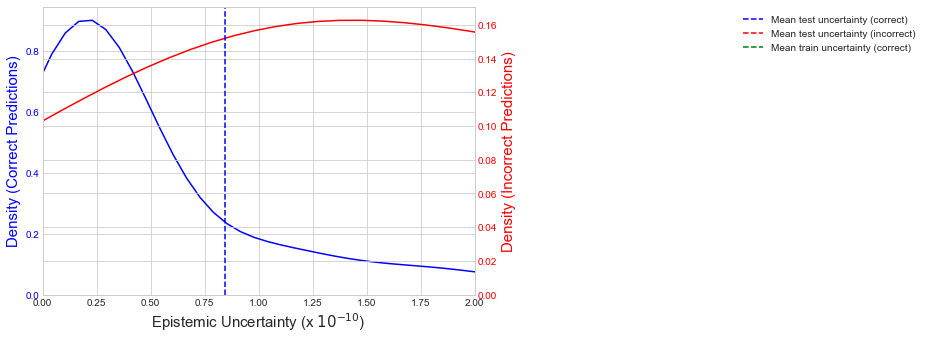

No handles with labels found to put in legend.


0
(2, 83)
1
(2, 22)
EpICC

0.9523809523809523
0.9030668127053669
Filtering

0.9420289855072463
0.8928571428571428


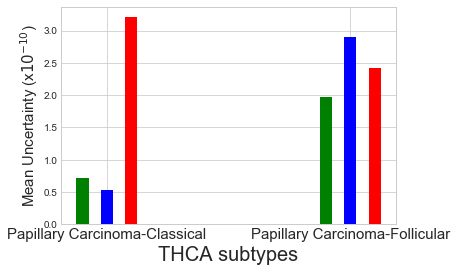

In [99]:
sns.set_style('whitegrid')
dict_mean_ep,dict_mean_test_corr,dict_mean_test_incorr,res,list_final_test,list_final_pred,arr_pred_test_new = uncertainty_analysis(logits_train,y_train,arr_pred_train,logits,y_test,arr_pred_test,1e-10,analysis_type)

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


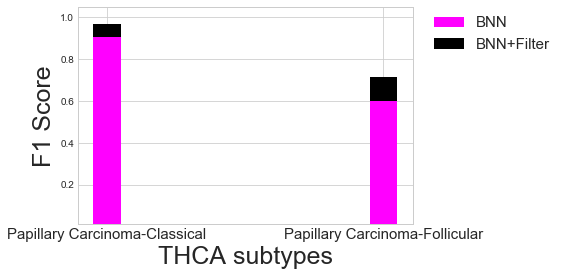

In [102]:
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
plt.bar(np.arange(0,len(fscore)),fscore,label = 'BNN',color='magenta',width=0.1)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter-fscore,bottom = fscore,label = 'BNN+Filter',color='black',width=0.1)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('THCA subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1.45, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('baseline_filter_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [73]:
len(list_final_pred)/len(y_test)

0.6571428571428571

C:\Users\Prasoon\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


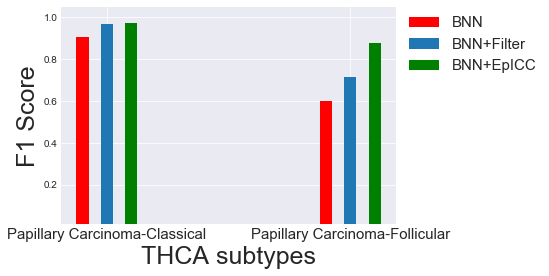

In [74]:
sns.set_style('darkgrid')
fig = plt.figure()
fscore = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test))[2]
fscore_filter = precision_recall_fscore_support(np.array(list_final_test),np.array(list_final_pred))[2]
fscore_corrected = precision_recall_fscore_support(np.array(y_test),np.array(arr_pred_test_new))[2]
plt.bar(np.arange(0,len(fscore))-0.1,fscore,label = 'BNN',color='r',width=0.05)
plt.bar(np.arange(0,len(fscore_filter)),fscore_filter,width=0.05,label = 'BNN+Filter')
plt.bar(np.arange(0,len(fscore_corrected))+0.1,np.array(fscore_corrected),label='BNN+EpICC',color='g',width=0.05)
plt.ylabel('F1 Score',fontsize=25)
plt.xlabel('THCA subtypes',fontsize=25)
plt.xticks(np.arange(0,len(fscore)),cancer_types,fontsize=15)
plt.ylim((0.01,1.05))
plt.legend(bbox_to_anchor=(1, 1.02),prop={'size':15})
ax = plt.axes()
ax.yaxis.grid(True,which='major')
fig.savefig('Desktop/paper_revision/'+str('method_comparison_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [ ]:
ep_test = com_ep_un(logits)
acc_2 = []
l_temp = np.arange(0.1,20.1,0.1)
sam_2 = []
for j in l_temp:
    list_final_pred = []
    list_final_test = []
    for i in range(len(arr_pred_test)):
        if (ep_test[i]*1e9 <= j* dict_mean_ep[arr_pred_test[i]]):
            list_final_test.append(np.array(y_test)[i])
            list_final_pred.append(arr_pred_test[i])
    acc_2.append(accuracy_score(list_final_test,list_final_pred))
    #acc_2.append(np.mean(precision_recall_fscore_support(list_final_test,list_final_pred)[1]))
    sam_2.append(len(list_final_test)*100/len(y_test))
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()
l1 = ax1.plot(l_temp,np.array(acc_2),c='r',linestyle='-',label='Overall Accuracy')
#l2 = ax1.plot(l_temp,np.array(acc_1)*100,c='r',label='Overall Accuracy method 1')
ax1.tick_params(axis='y', labelcolor='r')
l2 = ax2.plot(l_temp,sam_2,c='b',linestyle = '-',label = 'No. of samples' )
#l4 = ax2.plot(l_temp,sam_1,c='g',label='No. of samples method 1')
ax2.tick_params(axis='y', labelcolor='b')
leg = l2+l1
ax1.set_ylabel('Overall Accuracy (%)', color='r',fontsize=15)
ax2.set_ylabel('% samples retained', color='b',fontsize=15)
ax1.set_xlabel('Filtering cut-off (Times train uncertainty)',fontsize=15)
labs = [l.get_label() for l in leg]
#ax1.legend()
ax1.legend(leg, labs, loc=(0.6,0.77))
ax2.set_yticks(np.arange(0,110,10))
ax1.set_xticks(np.arange(0,21))
#ax1.legend(bbox_to_anchor=(1,0.65))
#ax2.legend(bbox_to_anchor=(0.99,0.80))
#ax2.grid(None)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.grid()
fig.savefig('Desktop/paper_revision/'+str('filtering_cutoff_')+analysis_type+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
#fig.savefig('Desktop/paper_figures/'+str('times_train_uncertainty_plot')+'.pdf', format='pdf', dpi=1200,bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure()
plt.ylim(0.0,1.0)
plt.bar([1,2,3,4,5,6],[0.6061946902654868,0.4485981308411215,0.7077625570776256,0.6216216216216216,0.7,0.6571428571428571],width =0.2,color='black')
plt.xticks([1,2,3,4,5,6],['All cancer types', 'LGG subtypes','BRCA subtypes', 'COEN subtypes','ESCA subtypes','THCA sutypes'],rotation=30,fontsize=12)
plt.ylabel('% samples retained',fontsize=20)
fig.savefig('Desktop/paper_revision/num_samples_retained.pdf', format='pdf', dpi=1200,bbox_inches='tight')

# External Validation

In [20]:
analysis_type='external_validation'
cancer_types = ['LAML','ACC','BLCA','LGG','BRCA','CESC','CHOL','COAD','UCEC','ESCA','GBM','HNSC','KIRC','KIRP','LIHC','LUAD','LUSC','DLBC','MESO','OV','PAAD','PCPG','PRAD','READ','SKCM','STAD','TGCT','THYM','THCA','UCS','UVM']
np.random.seed(0)
r = np.random.randint(500)
df_pca2 = pd.read_csv('D:/New folder/100_genes_pca2_new.csv')
(X_train, X_test, y_train, y_test) = split_train_test(df_pca2,r)

In [21]:
df_test = pd.read_csv('Desktop/combined_external.csv')

In [22]:
df_test = df_test[df_test['label'] == 4] 

In [23]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [24]:
Ytrain = np.array(y_train).reshape(len(y_train),)
X_train = np.array(X_train.T.reset_index(drop=True))
Y_train = tf.Session().run(tf.one_hot(Ytrain,len(set(Ytrain)),axis=1)).reshape(len(Ytrain),len(set(Ytrain))).T
Ytest = np.array(y_test).reshape(len(y_test),)
X_test = np.array(X_test.T.reset_index(drop=True))
Y_test = tf.Session().run(tf.one_hot(Ytest,len(set(Ytest)),axis=1)).reshape(len(Ytest),len(set(Ytest))).T

In [25]:
layers_dims = [X_train.shape[0],250,95,31]
[_,_,logits,logits_train,arr_pred_test,arr_pred_train,grad_val] = model(X_train=X_train,Y_train=Y_train,X_test =X_test,Y_test = Y_test, learning_rate=0.0005,num_epochs=3500,print_cost=True,layers_dims = layers_dims)

Cost after epoch 0: 100.214638
Cost after epoch 100: 98.668396
Cost after epoch 200: 97.784966
Cost after epoch 300: 97.394218
Cost after epoch 400: 97.209717
Cost after epoch 500: 97.043793
Cost after epoch 600: 96.973923
Cost after epoch 700: 96.903824
Cost after epoch 800: 96.873451
Cost after epoch 900: 94.251862
Cost after epoch 1000: 94.231339
Cost after epoch 1100: 94.145981
Cost after epoch 1200: 94.149834
Cost after epoch 1300: 94.132957
Cost after epoch 1400: 94.144089
Cost after epoch 1500: 94.114418
Cost after epoch 1600: 92.242096
Cost after epoch 1700: 92.206703
Cost after epoch 1800: 92.249779
Cost after epoch 1900: 92.191315
Cost after epoch 2000: 92.212646
Cost after epoch 2100: 90.734207
Cost after epoch 2200: 90.751938
Cost after epoch 2300: 90.727829
Cost after epoch 2400: 90.691910
Cost after epoch 2500: 89.541817
Cost after epoch 2600: 89.578423
Cost after epoch 2700: 89.524017
Cost after epoch 2800: 88.507179
Cost after epoch 2900: 88.540108
Cost after epoch 3000

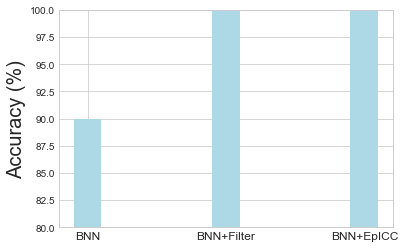

In [19]:
fig = plt.figure()
plt.ylim(80,100)
plt.bar([1,2,3],[90,100,100],width =0.2,color='lightblue')
plt.xticks([1,2,3],['BNN','BNN+Filter','BNN+EpICC'],fontsize=12)
plt.ylabel('Accuracy (%)',fontsize=20)
fig.savefig('Desktop/paper_revision/external_validation.pdf', format='pdf', dpi=1200,bbox_inches='tight')